### Purpose of this notebook: Develop algorithms to procedurally generate block construction targets 

* blockworld is 8x8 grid
* allowable blocks are: 1x1, 2x2, 4x4 squares and the triangles that comprise them
* target difficulty roughly varies according to shape and number of holes
* constraints on construction include: 
    * physical stability (a tipped over triangle will fall!)
    * geometry (presence & shape of "holes")
    * inventory (not infinite number of large 8x2 blocks!)
    * cost (# blocks)

In [5]:
from __future__ import division

import numpy as np
import os, sys
from PIL import Image

from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

from IPython.core.pylabtools import figsize, getfigs

import seaborn as sns

import random

from scipy.stats import norm
from IPython.display import clear_output

import copy
import importlib


## TODO: convert to python3

### define paths

In [10]:
## root paths
curr_dir = os.getcwd()
proj_dir = os.path.abspath(os.path.join(curr_dir,'..','..')) ## use relative paths

## add helpers to python path
import sys
if os.path.join(proj_dir, 'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir, 'stimuli'))

## custom helper modules
import separation_axis_theorem as sat
import blockworld_helpers as utils

In [11]:
reload(utils)

<module 'blockworld_helpers' from '/Users/judithfan/block_construction/stimuli/blockworld_helpers.pyc'>

### start with simple cases 

#### define inventory of block types, positioned at origin

In [ ]:
class Block:
    '''
    Base Block class for defining a block object with attributes
    '''
    
    def __init__(self, width=1, height=1, shape='rectangle'):
        self.verts = np.array([(0, 0), 
                               (0, -1 * height), 
                               (1 * width, -1 * height), 
                               (1 * width, 0), 
                               (0,0)]) 
        self.width = width
        self.height = height
        self.shape = shape

    def init(self):
        self.corners = self.get_corners(self.verts)
        self.area = self.get_area(self.dims,shape=self.shape) 
        
    def translate(self,verts, dx, dy):
        '''
        input:
            verts: array or list of (x,y) vertices of convex polygon. 
                    last vertex = first vertex, so len(verts) is num_vertices + 1
            dx, dy: distance to translate in each direction
        output:
            new vertices
        '''
        new_verts = copy.deepcopy(verts)
        new_verts[:,0] = verts[:,0] + dx
        new_verts[:,1] = verts[:,1] + dy
        return new_verts

    def get_corners(self,verts):
        '''
        input: list or array of block vertices in absolute coordinates
        output: absolute coordinates of top_left, bottom_left, bottom_right, top_right
        '''
        corners = {}
        corners['top_left'] = verts[0]
        corners['bottom_left'] = verts[1]
        corners['bottom_right'] = verts[2]
        corners['top_right'] = verts[3]
        return corners

    def get_area(self,dims,shape='rectangle'):
        '''
        input: w = width 
               h = height           
               shape = ['rectangle', 'square', 'triangle']
        output
        '''
        ## extract width and height from dims dictionary
        w = dims['width']
        h = dims['height']    
        if shape in ['rectangle','square']:
            area = w*h
        elif shape=='triangle':
            area = w*h*0.5
        else:
            print('Shape type not recognized. Please use recognized shape type.')
        return area   

In [12]:
x = utils.Block(width = 5, height = 2)

In [18]:
x.init()

In [19]:
x.area

10

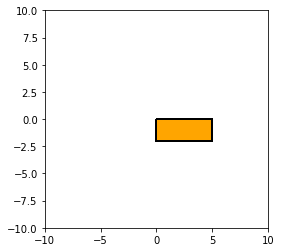

In [14]:
patch = utils.get_patch(x.verts)
patches = [patch]
utils.render_blockworld(patches)

In [ ]:
## block primitives

#### squares
s1 = np.array([(0, 0), (0, -1), (1, -1), (1, 0), (0,0)]) ## 1x1
s2 = s1*2 ## 2x2
s4 = s1*4 ## 4x4

In [ ]:
## render two blocks side by side
patch1 = utils.get_patch(s4)
patch2 = utils.get_patch(s2-2)
patch3 = utils.get_patch((utils.translate(s4, 2, 2)))

patches = [patch1,patch2,patch3]

utils.render_blockworld(patches)

In [ ]:
## distinguish between two blocks merely touching & actually coinciding 
reload(sat)
print sat.separating_axis_theorem(s2[:-1]-2,s4[:-1]) ## 
print sat.apply_sat(s2[:-1]-2,s4[:-1])

In [ ]:
## sketch of blocklaying procedure:

## sample block size and place in leftmost, lowest position that you can and place in the array

## make sure that no blocks collide

## keep going until the summed area of all blocks equals or exceeds the total area of the arena

## fill these crevices

In [8]:
reload(utils)

<module 'blockworld_helpers' from 'blockworld_helpers.py'>

In [15]:
x = utils.Block(width = 2, height = 5)

In [16]:
x.init()

In [17]:
x.area

10

In [ ]:
def return_corners(s):
    '''
    input: list or array of block vertices in absolute coordinates
    output: absolute coordinates of top_left, bottom_left, bottom_right, top_right
    '''
    corners = {}
    corners['top_left'] = s[0]
    corners['bottom_left'] = s[1]
    corners['bottom_right'] = s[2]
    corners['top_right'] = s[3]
    return corners

def get_width_and_height(corners):
    '''
    input: corners dictionary, containing top_left, bottom_left, bottom_right, top_right
    output: return dims dictionary, containing width and height    
    '''
    dims = {}
    dims['width'] = np.abs(bottom_right[0] - top_left[0])
    dims['height'] = np.abs(bottom_right[1] - top_left[1])       
    return dims

def compute_area(dims,shape='rectangle'):
    '''
    input: w = width 
           h = height           
           shape = ['rectangle', 'square', 'triangle']
    output
    '''
    ## extract width and height from dims dictionary
    w = dims['width']
    h = dims['height']    
    if shape in ['rectangle','square']:
        area = w*h
    elif shape=='triangle':
        area = w*h*0.5
    else:
        print('Shape type not recognized. Please use recognized shape type.')
    return area

In [ ]:
reload(utils)
corners = utils.return_corners(s4)
print(corners)


In [ ]:
dims = utils.get_width_and_height(corners)
print(dims)

In [ ]:
area = utils.compute_area(dims)

In [ ]:
area

In [ ]:
## utils
## write function that takes primitive block and places it in the correct place in the arena 
## (applies the appropriate delta-x, delta-y displacement)

## given vertices, returns four corners

## returns current state of the "floor": 
## deviations from flat that constrain how new blocks can be placed


In [ ]:
importlib.reload(utils)
square = np.array([(0, 0), (0, -1), (1, -1), (1, 0), (0,0)]) 
square

In [ ]:
utils.translate(square, 2, 2)

In [ ]:
block = [s1,s2,s4]

block_widths = [,2,4]


floor_blocks = []
viable_block_widths = [1,2,4]
remaining_space = 8
while remaining_space > 0:
    b = random.choice(viable_block_widths)
    if b <= remaining_space:
        floor_blocks.append(b)
        remaining_space -= b
    else:
        viable_block_widths.pop()
print(floor_blocks)
    

In [ ]:
blockWidths = [1,2,4]
random.choice(blockWidths)